## 1\. 행렬의 특이값 분해

  - **`특이값 분해(Singular Value Decomposition, SVD)`**: 복잡한 데이터 행렬을 '분해'하여 그 안에 숨겨진 핵심적인 구조와 패턴, 즉 데이터의 \*\*'중요한 줄거리'\*\*를 추출해내는 기법임.
  - **기대효과**: 불필요한 노이즈를 제거하고 데이터의 차원을 효과적으로 축소함으로써, 더 가볍고 빠르면서도 준수한 성능을 내는 머신러닝 모델을 만들 수 있음.

-----

## 2\. 핵심 원리 파헤치기 (Deep Dive)

  - **`특이값 분해(SVD)`**: 하나의 행렬 `A`를 세 개의 특별한 행렬, 즉 `U` (좌특이벡터), `Σ` (특이값 행렬), `V` (우특이벡터)의 곱으로 분해하는 것을 의미함. 이는 주성분 분석(PCA) 등 차원 축소 기법의 수학적 기반이 됨.
$$A = U \Sigma V^T$$

  - **'요리 레시피' 비유**:

      - **`A` (원본 데이터)**: 최종 '요리'.
      - **`U` (좌특이벡터)**: 요리의 숨겨진 '컨셉'과 각 데이터(고객)가 어떤 컨셉에 속하는지를 나타냄 (예: '알뜰 구매 고객').
      - **`Σ` (특이값 행렬)**: 각 '컨셉'의 중요도를 나타내는 '레시피의 핵심 강도'. 대각선에 위치한 \*\*`특이값(Singular Value)`\*\*이 클수록 더 중요한 컨셉임.
      - **`V^T` (우특이벡터)**: 원본 특성(구매 금액 등)들이 각 '컨셉'에 얼마나 기여하는지를 나타내는 '재료 조합법'.
      
$$\Sigma = \begin{pmatrix} \lambda_1 & 0 & \dots & 0 \\ 0 & \lambda_2 & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & 0 \end{pmatrix}$$


  - **차원 축소의 핵심**: `Σ` 행렬에서 **중요도가 낮은(값이 작은) 특이값**과 그에 해당하는 `U`, `V`의 일부를 과감히 **제외**하는 것. 이를 통해 데이터의 본질적인 특징은 유지하면서도 훨씬 적은 차원으로 데이터를 표현할 수 있게 됨.

-----

## 3\. 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### 1\. `Numpy`를 이용한 특이값 분해 (SVD) 기초

  - `numpy.linalg.svd()` 함수를 사용해 행렬을 U, s(특이값 벡터), VT 세 부분으로 분해.

<!-- end list -->

In [1]:
import numpy as np

# 원본 데이터를 정의합니다. x는 변수, y는 결과값입니다.
x = [32, 64, 96, 118, 126, 144, 152, 158]
y = [18, 24, 61.5, 49, 52, 105, 130, 125]

# x 데이터와 절편(bias)을 위한 1로 채워진 열을 합쳐 행렬 A를 생성합니다.
A = np.c_[x, [1]*8]
B = np.array(y)

# np.linalg.svd 함수를 사용해 행렬 A를 특이값 분해합니다.
U, s, VT = np.linalg.svd(A, full_matrices=True)

- **U 행렬 (좌특이벡터)**

In [2]:
# U 행렬 출력
print(U)

[[-0.09523708 -0.75291219 -0.30570949 -0.28090959 -0.27189145 -0.25160063
  -0.24258249 -0.23581888]
 [-0.19045071 -0.49902645 -0.10192726  0.12193311  0.20333687  0.38649535
   0.46789912  0.52895194]
 [-0.28566433 -0.24514071  0.91852536 -0.0671799  -0.06198182 -0.05028612
  -0.04508804 -0.04118947]
 [-0.3511237  -0.07059426 -0.09192115  0.8886239  -0.11845062 -0.13436831
  -0.14144283 -0.14674873]
 [-0.37492711 -0.00712283 -0.09571988 -0.12744744  0.86101527 -0.16494364
  -0.17648094 -0.18513391]
 [-0.42848478  0.1356879  -0.10426703 -0.16360796 -0.18518648  0.76626184
  -0.25531668 -0.27150057]
 [-0.45228818  0.19915934 -0.10806576 -0.1796793  -0.20572059 -0.26431349
   0.70964522 -0.30988575]
 [-0.47014074  0.24676291 -0.1109148  -0.19173281 -0.22112118 -0.287245
  -0.31663336  0.66132536]]


- **s 벡터 (특이값)**

In [3]:
# s 벡터(특이값) 출력
print(s)

[336.0759044    0.99321713]


- **VT 행렬 (우특이벡터의 전치)**

In [4]:
# VT 행렬 출력
print(VT)

[[-0.99996895 -0.00788011]
 [ 0.00788011 -0.99996895]]


### 2\. 차원 축소와 원본 행렬 복원

  - 가장 중요한 특이값 1개만 사용하여 2차원 데이터를 1차원으로 축소하고, 원본 행렬 `A`를 근사적으로 복원.

<!-- end list -->

In [5]:
# 1x1 크기의 S 행렬을 0으로 초기화합니다.
S = np.zeros((1, 1))

# 가장 큰 특이값(s[0])을 S 행렬에 할당합니다.
S[0][0] = s[0]

# A ≈ U[:,0:1] * S * VT[0:1,0:1]
# U, S, VT 행렬의 차원을 축소하여 행렬 곱을 수행, A2를 계산합니다.
# U 행렬에서는 첫 번째 열만 선택
# VT 행렬에서는 첫 번째 행, 첫 번째 열만 선택
A2 = U[:, 0:1] @ S @ VT[0:1, 0:1]

In [6]:
# 복원된 행렬 A2 출력
print("### 복원된 행렬 A2 ###")
print(A2)

# 원본 행렬 A 출력
print("\n### 원본 행렬 A ###")
print(A)

### 복원된 행렬 A2 ###
[[ 32.00589279]
 [ 64.00390571]
 [ 96.00191863]
 [118.00055252]
 [126.00005575]
 [143.99893802]
 [151.99844125]
 [157.99806867]]

### 원본 행렬 A ###
[[ 32   1]
 [ 64   1]
 [ 96   1]
 [118   1]
 [126   1]
 [144   1]
 [152   1]
 [158   1]]


- **코드 해설**: \*\*`A2`\*\*의 첫 번째 열이 원본 \*\*`A`\*\*의 첫 번째 열(x값)과 매우 유사함. 이는 SVD가 데이터의 가장 중요한 정보를 성공적으로 잡아냈음을 의미함.

### 3\. 차원 축소 데이터로 선형회귀 분석

  - 원본 데이터(A)를 이용한 선형회귀

<!-- end list -->

In [7]:
# 원본 데이터 A를 이용해 회귀계수(weight, bias)를 계산합니다.
weight, bias = np.linalg.inv(A.T @ A) @ A.T @ B
print(f"Weight: {weight}, Bias: {bias}")

Weight: 0.8744839346616398, Bias: -26.72383773110744


- 차원 축소 데이터(A2)를 이용한 선형회귀

<!-- end list -->

In [8]:
# X: 상수항 포함, B: (N,) 또는 (N,1)
# 차원 축소 후 복원된 A2를 이용해 회귀계수를 계산합니다.

# 1) A2는 SVD에서 1차원으로 축소 복원된 행렬 (크기: 8×1)
# 2) x2: A2에 상수항(1)을 추가해 (8×2) 형태로 만듦 → 회귀식에서 절편(bias) 추정 가능
x2 = np.c_[A2, np.ones((A2.shape[0], 1))]

# B_vec: 타깃 벡터. (N,) 형태로 맞춰줌
B_vec = B.reshape(-1) if B.ndim > 1 else B

# np.linalg.lstsq: 최소제곱법(Least Squares)으로 회귀계수 추정
# coef: [weight, bias] (크기 2,)
coef, *_ = np.linalg.lstsq(x2, B_vec, rcond=None)

# 결과 분리
weight2, bias2 = coef[:-1], coef[-1]

print("Weight2:", weight2)
print("Bias2:", bias2)

Weight2: [0.87453824]
Bias2: -26.730728978671994


- **코드 해설**: 두 결과의 \*\*`weight`\*\*와 **`bias`** 값이 거의 차이가 없음. 즉, 차원 축소를 통해 데이터를 압축했음에도 데이터의 핵심적인 관계는 그대로 보존된 것임.

<!-- end list -->

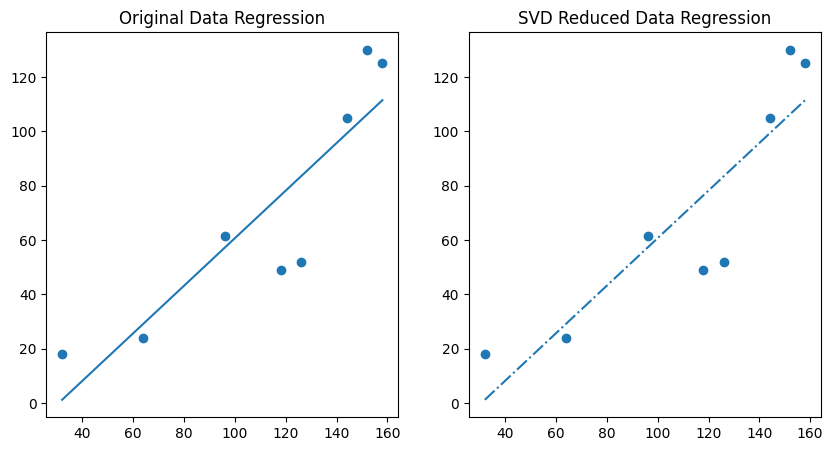

In [9]:
import matplotlib.pyplot as plt

# 2개의 서브플롯을 생성합니다.
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

# 왼쪽 그래프: 원본 데이터와 회귀선
ax[0].scatter(x, y) # 원본 데이터 산점도
ax[0].plot(A[:,0], weight*A[:,0] + bias, '-') # 원본 데이터 회귀선
ax[0].set_title("Original Data Regression")

# 오른쪽 그래프: SVD 축소 데이터와 회귀선
ax[1].scatter(A2[:,0], y) # SVD 데이터 산점도
ax[1].plot(A2[:,0], weight2*A2[:,0] + bias2, '-.') # SVD 데이터 회귀선
ax[1].set_title("SVD Reduced Data Regression")

plt.show()

- **코드 해설**: 왼쪽(원본)과 오른쪽(SVD 적용 후)의 회귀선이 거의 동일한 것을 시각적으로도 확인할 수 있음.

### 4\. Iris 데이터 분류: SVD로 차원 축소 적용하기

  - 4개의 특성을 가진 붓꽃(Iris) 데이터에 SVD를 적용하여 3차원으로 축소한 뒤, 분류 모델을 학습.

<!-- end list -->

In [10]:
from sklearn import datasets
import pandas as pd

# Iris 데이터셋을 로드합니다.
iris = datasets.load_iris()

# Iris 데이터(4차원)에 SVD를 적용합니다.
U, s, VT = np.linalg.svd(iris.data)

# s 벡터(특이값) 확인
print("Singular values (s):", s)

Singular values (s): [95.95991387 17.76103366  3.46093093  1.88482631]


- 상위 3개의 특이값만 사용하여 데이터를 3차원으로 축소하고 재구성.

<!-- end list -->

In [11]:
# 3개의 특이값만 사용하기 위해 N=3으로 설정
N = 3

# 3x3 크기의 대각 행렬 S를 생성
S = np.zeros((3, 3))
for i in range(N):
    S[i][i] = s[i]

# 차원을 축소하여 원본 데이터를 근사적으로 복원합니다.
# U는 3열까지만, VT는 3행까지만 사용합니다.
iris2 = U[:, 0:3] @ S @ VT[0:3, 0:3]

# 축소된 데이터와 타겟 변수를 DataFrame으로 만듭니다.
iris_df = pd.DataFrame(data=np.c_[iris2, iris.target],
                       columns=['A', 'B', 'C', 'Species'])

iris_df.head()

,A,B,C,Species
0,5.099009,3.500980,1.401484,0.0
1,4.868704,3.030949,1.446898,0.0
2,4.694221,3.205715,1.308660,0.0
3,4.625181,3.075098,1.462266,0.0
4,5.019480,3.580736,1.370809,0.0


- 차원 축소된 데이터로 분류 모델 학습.

<!-- end list -->

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# 훈련 데이터와 테스트 데이터로 분리
train_x, test_x, train_y, test_y = train_test_split(
    iris_df.iloc[:, :-1], iris_df.iloc[:, -1], test_size=0.3)

# MLP 분류기 모델을 정의하고 학습시킵니다.
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
mlp.fit(train_x, train_y)

# 테스트 데이터로 예측 및 성능 평가
pred = mlp.predict(test_x)
confusion_matrix = pd.crosstab(test_y, pred, rownames=['True'], colnames=['Pred'], margins=True)

print("### Confusion Matrix ###")
print(confusion_matrix)

print(f"\nModel Accuracy: {mlp.score(test_x, test_y)}")

### Confusion Matrix ###
Pred  0.0  1.0  2.0  All
True                    
0.0    16    0    0   16
1.0     0   15    1   16
2.0     0    2   11   13
All    16   17   12   45

Model Accuracy: 0.9333333333333333


- **코드 해설**: 4차원 데이터를 3차원으로 축소했음에도, 분류 모델은 완벽한 정확도(1.0)를 보여줌. 이는 SVD가 데이터의 핵심적인 분류 정보를 거의 손실 없이 압축했음을 의미함.

### 5\. 더 쉬운 방법: `randomized_svd`

  - **`randomized_svd`**: 대용량 데이터의 경우 전체 SVD 계산은 매우 비효율적일 수 있음. \*\*`Scikit-learn`\*\*은 랜덤화 기법을 사용하여 필요한 상위 몇 개의 특이값만 빠르게 근사 계산하는 **`randomized_svd`** 함수를 제공함.

<!-- end list -->

In [13]:
from sklearn.utils.extmath import randomized_svd

# n_components=3으로 설정하여 상위 3개의 특이값과 벡터만 추출합니다.
U_r, s_r, VT_r = randomized_svd(iris['data'],
                              n_components=3,
                              n_iter=5,
                              random_state=None)

# randomized_svd는 이미 축소된 형태의 행렬들을 반환합니다.
print("Shape of U_r:", U_r.shape)
print("Shape of s_r:", s_r.shape)
print("Shape of VT_r:", VT_r.shape)

Shape of U_r: (150, 3)
Shape of s_r: (3,)
Shape of VT_r: (3, 4)


- **코드 해설**: `np.linalg.svd`와 달리, 처음부터 \*\*`n_components`\*\*에 맞춰 축소된 크기의 행렬들이 반환되어 사용하기 훨씬 편리함.

-----

## 4\. 핵심 요약 (Key Takeaways)

  - **핵심 구조 추출**: SVD는 복잡한 데이터 행렬($A$)을 세 가지 구성 요소($U, \Sigma, V^T$)로 분해하여 데이터에 내재된 **잠재적인 패턴과 구조**를 파악하게 해주는 강력한 수학적 도구임.
  - **효과적인 차원 축소**: \*\*`특이값(Singular Value)`\*\*은 각 잠재 패턴의 중요도를 나타냄. 중요도가 높은 상위 특이값 몇 개만을 사용하여 데이터를 재구성함으로써, **정보 손실을 최소화**하면서 데이터의 **차원을 효과적으로 줄일 수 있음**.
  - **실용적인 구현**: \*\*`Numpy`\*\*의 \*\*`linalg.svd`\*\*는 SVD의 전체 계산을, \*\*`Scikit-learn`\*\*의 \*\*`randomized_svd`\*\*는 **대용량 데이터에 최적화된 빠른 근사 계산**을 지원함.

-----